Project: Student Result Analysis Using K-means and Fuzzy C-means

dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Algorithms: KMeans, Fuzzy C-Means

Inspiration: To understand the influence of the parents background, test preparation, etc on students performance

Main Steps:
1. Data preprocessing
2. Outlier Detection
3. Basic Analysis
4. Apply KMeans and visualize results
5. Apply Fuzzy C-means and visualize results
6. Performance Evaluation
7. Conclusion, represent knowledge

In [223]:
import seaborn as sns  # Visualize data
import matplotlib.pyplot as plt
import os
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Preprocessing, 
from sklearn.cluster import KMeans
import plotly.express as px
import random
import operator
import math

In [224]:
# Read student data from csv file
df = pd.read_csv('StudentsPerformance.csv')

In [225]:
# Check data by displaying data head 
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [226]:
# Check data by displaying data tail 
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Data is read perfectly!!! Start data pre-processing!

In [227]:
# Generate descriptive statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [228]:
# Check data type of cols
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [229]:
# Check if data has missing values
df.isna().sum()
# No missing values
# if there are, run this to delete all rows that contain empty cells

#df = df.dropna(inplace=True)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [230]:
# Check duplicated rows
df.duplicated().sum()

# No duplicated rows

0

We should rename all attributes as they are long

In [231]:
# Rename cols
df.rename(columns={"race/ethnicity": "race", 
                  "parental level of education": "parent_education",
                  "math score": "math", 
                  "reading score": "reading", 
                  "writing score": "writing", 
                  "test preparation course": "test_preparation"}
                  , inplace=True)
# Show dataframe after renaming
df.head(10)


,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Check whether this dataset has outliers.
Clustering algorithms are very sensitive with outliers.
We use Std deviation to detect outliers.
We define a function named outlier_dectection.

In [232]:
# Define an outlier check function
def outlier_dectection (df, column):
   data_mean, data_std = df[column].mean(), df[column].std()
   cut_off = data_std * 3
   lower, upper = data_mean - cut_off, data_mean + cut_off
   print('The lower bound value is', lower)
   print('The upper bound value is', upper)
   df1 = df[df[column] > upper]
   df2 = df[df[column] < lower]
   print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
   plt.figure(figsize = (10,5))
   sns.histplot(df[column], kde=False)
   plt.axvspan(xmin = lower,xmax= df[column].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= df[column].max(),alpha=0.2, color='red')
   return lower, upper

The lower bound value is 20.59975971197165
The upper bound value is 111.57824028802835
Total number of outliers are 4


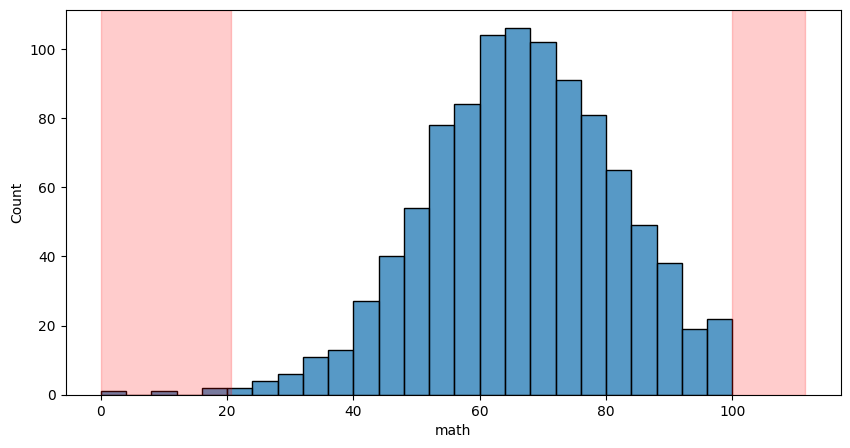

In [233]:
# Check outliers in math col
lower, upper = outlier_dectection(df, 'math')

# Remove outliers
df = df[(df['math'] < upper) & (df['math'] > lower)]

The lower bound value is 26.189102205790704
The upper bound value is 112.48158052513298
Total number of outliers are 3


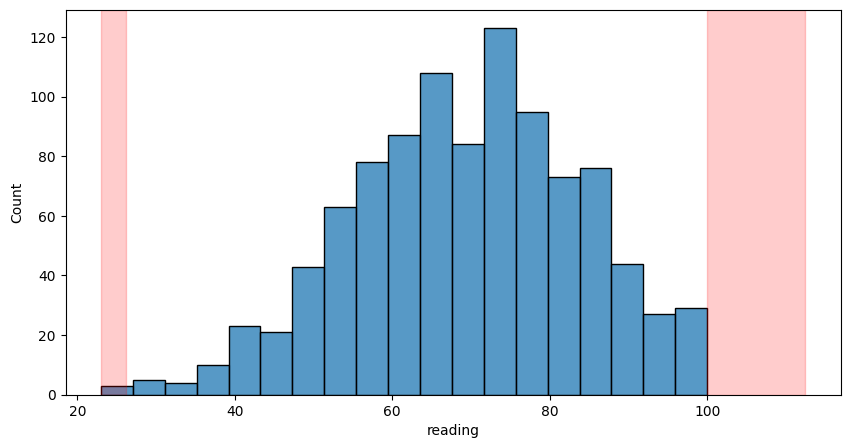

In [234]:
# Check outliers in reading col
lower, upper = outlier_dectection(df, 'reading')

# Remove outliers
df = df[(df['reading'] < upper) & (df['reading'] > lower)]

The lower bound value is 24.225961923417813
The upper bound value is 112.54140967779064
Total number of outliers are 0


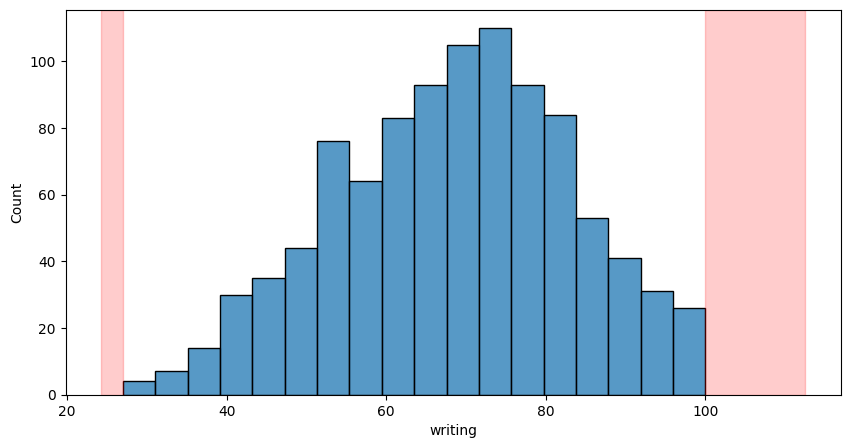

In [235]:
# Check outliers in writing col
lower, upper = outlier_dectection(df, 'writing')

# Remove outliers
df = df[(df['writing'] < upper) & (df['writing'] > lower)]

After removing all outliers, there are 993 rows left

In [236]:
df.describe()

,math,reading,writing
count,993.000000,993.000000,993.000000
mean,66.420947,69.471299,68.383686
std,14.661917,14.188799,14.719241
min,22.000000,28.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


Now, copy this final data into 3 dataset: for data understanding, for k-means clutering and for FCM clustering.

In [237]:
#Data use for basic researching
research_df = df.copy()

#Data use for clustering
kmeans_df = df.copy()
fcm_df = df.copy()

#Data Understanding

In [238]:
# Add a average score column
research_df['final score'] = research_df[['math', 'reading', 'writing']].mean(axis=1)
research_df.head(20)

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


Looking at these records we can say that: a student's scores in all 3 subjects are not very different.

Now try to group and analyze by some attributes

First is gender

[64.04085603 68.97494781]
[72.95719844 65.73068894]
[72.85019455 63.5908142 ]


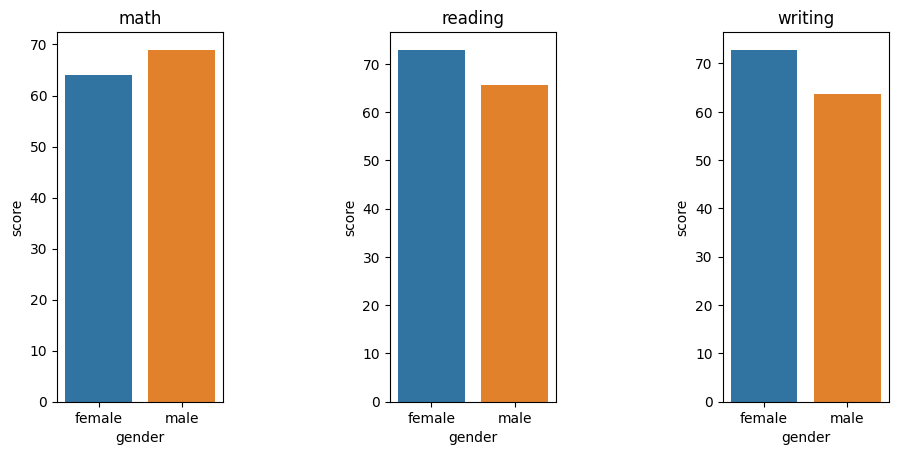

In [239]:
#Showing scores base on gender
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    gender_df = research_df.groupby('gender')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=gender_df.index, y=gender_df.loc[:,"mean"].values)
    print(gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(research_df.columns[-4:-1])[i])

Now is race/ethnicity

[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]


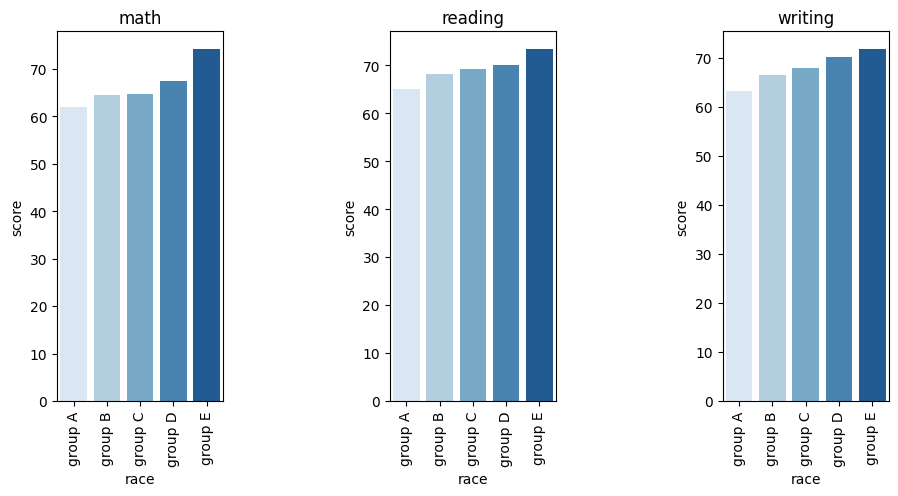

In [240]:
#Showing scores base on race
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    race_df = research_df.groupby('race')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=race_df.index, y=race_df.loc[:,"mean"].values, palette='Blues')
    print(gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Now is the test preparing

[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]


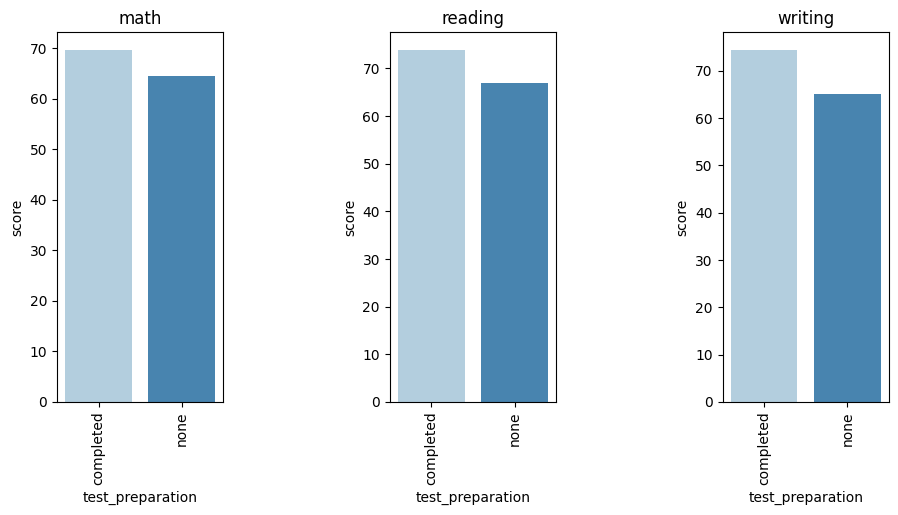

In [241]:
#Showing scores base on the test preparaion
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    test_df = research_df.groupby('test_preparation')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=test_df.index, y=test_df.loc[:,"mean"].values, palette='Blues')
    print(gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Or we could use box plot

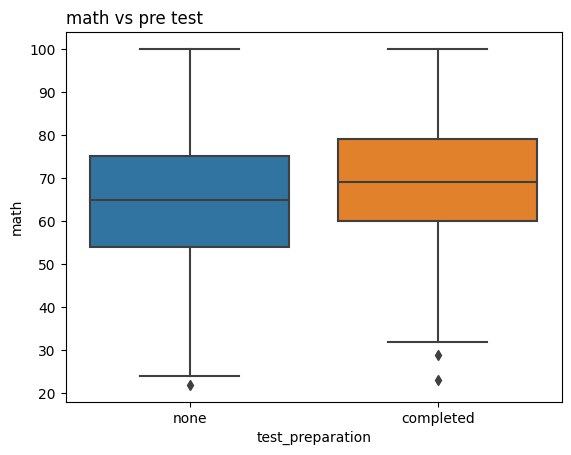

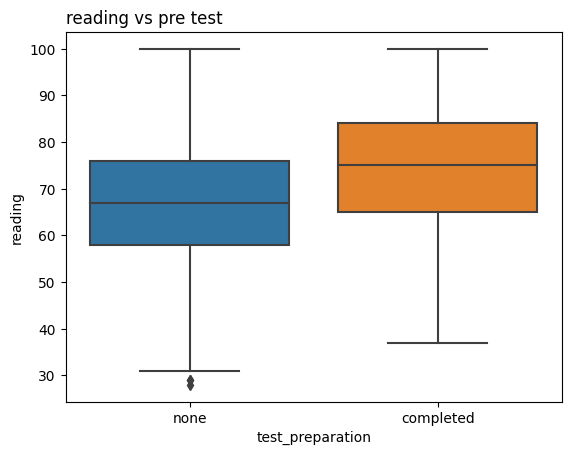

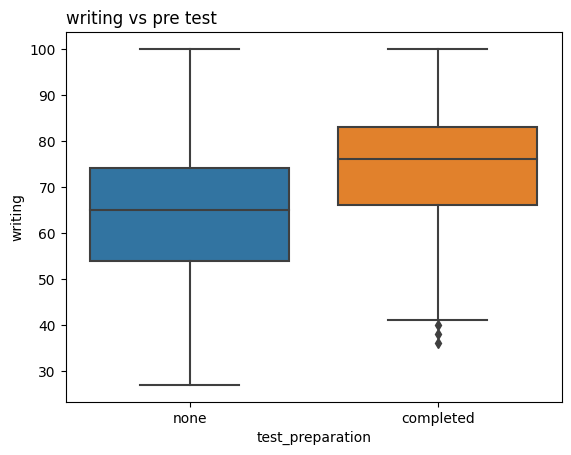

In [242]:
#Showing scores base on preparation before exams
for item in research_df.columns[-4:-1]:
    sns.boxplot(x=research_df["test_preparation"], y=research_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

Do that again with the lunch property

[59.52285714 70.17573872]
[65.23428571 71.77760498]
[63.65142857 70.95956454]


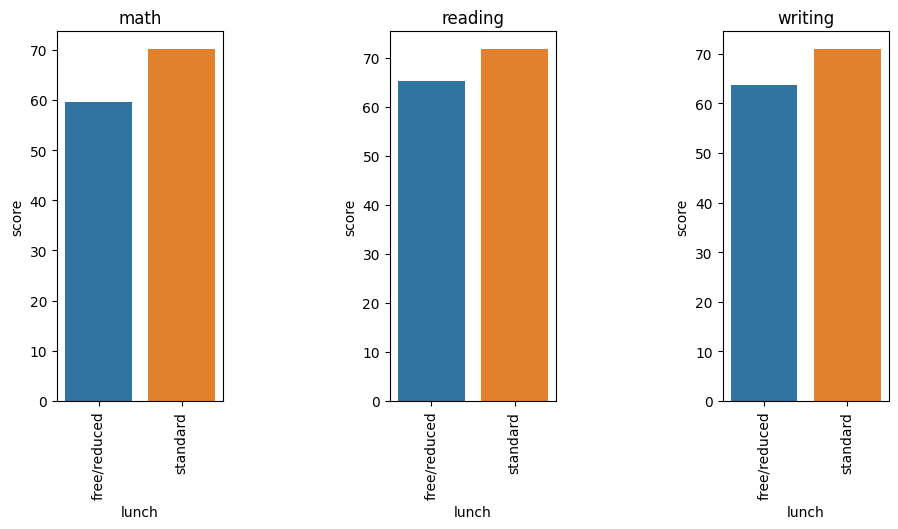

In [243]:
#Showing scores based on lunch
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    lunch_df = research_df.groupby('lunch')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=lunch_df.index, y=lunch_df.loc[:,"mean"].values)
    print(lunch_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Lastly, parents' education level

[67.88288288 69.38983051 62.58247423 69.74576271 67.51785714 64.30681818]
[70.92792793 73.         65.12371134 75.37288136 69.80803571 67.65340909]
[69.8963964  73.38135593 62.89690722 75.6779661  69.22767857 65.65340909]


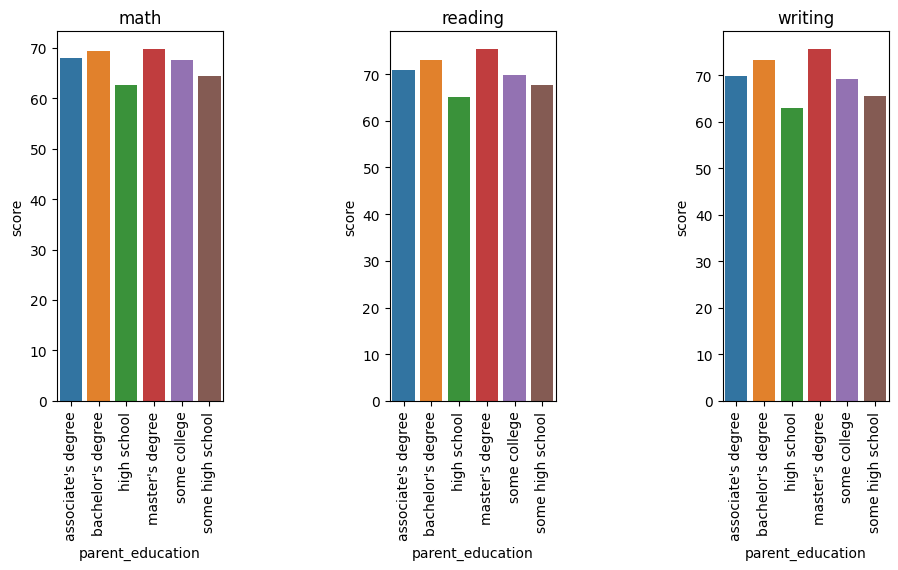

In [244]:
#Showing scores based on PEL
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    lunch_df = research_df.groupby('parent_education')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=lunch_df.index, y=lunch_df.loc[:,"mean"].values)
    print(lunch_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Do it in another way: final score

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

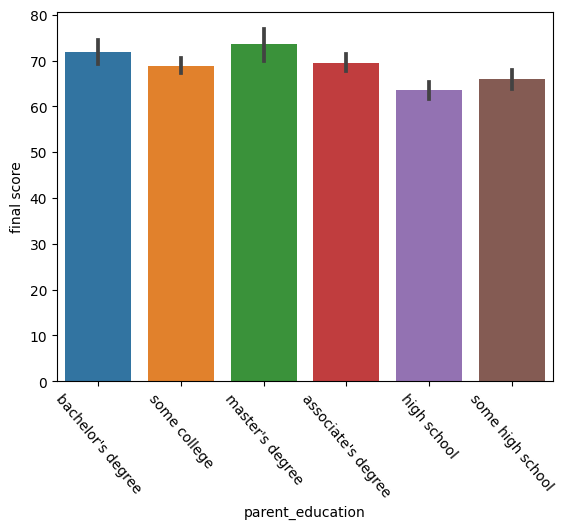

In [245]:
plt.figure()
sns.barplot(data=research_df, x='parent_education', y='final score')
plt.xticks(rotation=-50)

After that, we will try to encode nominal columns using LabelEncoder.

In [246]:
#Encode nominal columns
columns_encode = ['gender','race','parent_education','lunch','test_preparation']
for column in columns_encode: 
    encoder = LabelEncoder() 
    kmeans_df[column] = encoder.fit_transform(kmeans_df[column])
    print(encoder.classes_)
    print(np.sort(kmeans_df[column].unique()))

['female' 'male']
[0 1]
['group A' 'group B' 'group C' 'group D' 'group E']
[0 1 2 3 4]
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
[0 1 2 3 4 5]
['free/reduced' 'standard']
[0 1]
['completed' 'none']
[0 1]


Copy new dataset for FCM dataset

In [247]:
fcm_df = kmeans_df.copy()


In [248]:
fcm_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


After encoding, we could use these fields to calculate the correlation among columns

<Axes: >

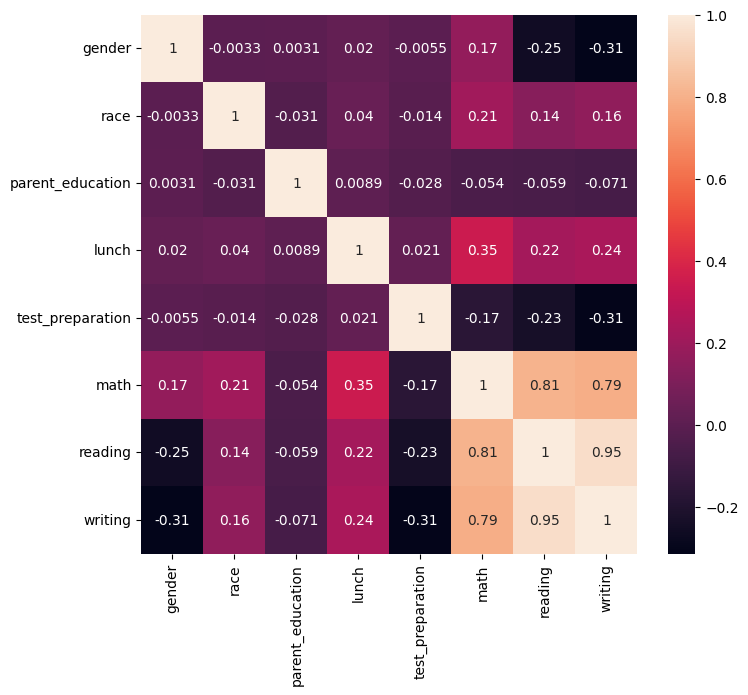

In [249]:
#Correlations among columns
correlations = kmeans_df.corr()
fig = plt.figure(figsize=(8,7))
sns.heatmap(data=correlations, annot=True)

##Finish data understanding

Now, let start clustering with the first algorithm, k-means.

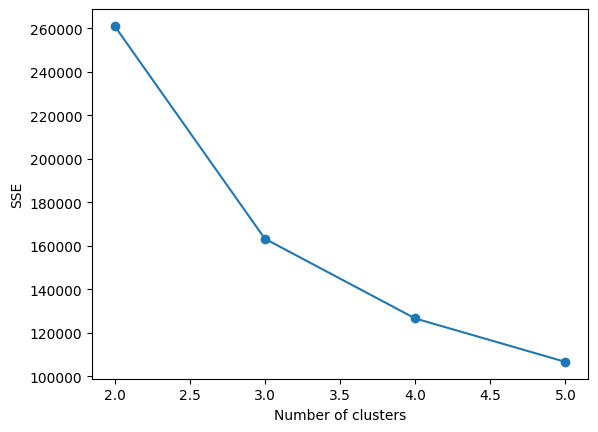

In [250]:
#Optimize k parameter in kmeans 
kmeans_dis = list()
for i in range(2, 6):  
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = i)
    kmeans.fit_transform(kmeans_df.iloc[:,2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,6)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

The number of cluster should be 3.

Now let's run k-means.

In [251]:
#Apply Kmeans with k=3
X = kmeans_df[["math","reading","writing"]] 
kmeans = KMeans(init = "k-means++", n_clusters = 3, n_init=3)
kmeans.fit_predict(X)
kmeans_label = kmeans.labels_
kmeans_df["cluster"] = kmeans_label
centroids = kmeans.cluster_centers_
kmeans_df.head(10)

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,cluster
0,0,1,1,1,1,72,72,74,2
1,0,2,4,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,1
3,1,0,0,0,1,47,57,44,0
4,1,2,4,1,1,76,78,75,2
5,0,1,0,1,1,71,83,78,1
6,0,1,4,1,0,88,95,92,1
7,1,1,4,0,1,40,43,39,0
8,1,3,2,0,0,64,64,67,2
9,0,1,2,0,1,38,60,50,0


let see the mean of score in each cluster

In [252]:
#See average scores in each cluster
class_df = kmeans_df.groupby("cluster")[kmeans_df.columns[-4:-1]].mean()
class_df

,math,reading,writing
cluster,,,
0,50.021898,52.324818,50.390511
1,82.609929,85.709220,84.907801
2,66.256293,69.743707,69.002288


Try to visualize 

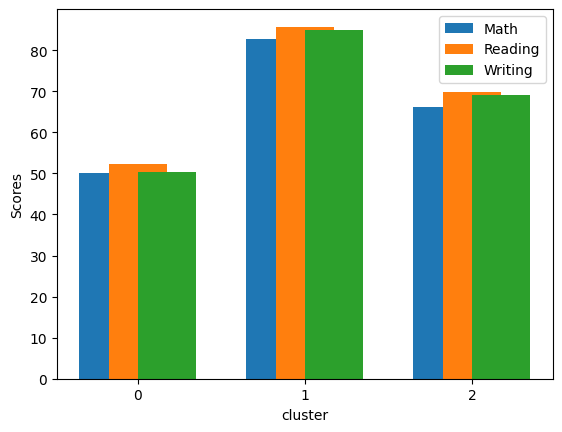

In [253]:
#Visualize scores base on each cluster
%matplotlib inline
ind = np.arange(3)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('cluster')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [254]:
kmeans_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,cluster
0,0,1,1,1,1,72,72,74,2
1,0,2,4,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,1
3,1,0,0,0,1,47,57,44,0
4,1,2,4,1,1,76,78,75,2
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,1
996,1,2,2,0,1,62,55,55,0
997,0,2,2,0,0,59,71,65,2
998,0,3,4,1,0,68,78,77,2


Visualize clusters in 3d

In [255]:
#Visualize clusters

#Naming clusters equal to color name
cluster_name = ({0 : 'Red', 
                        1 : 'Blue',
                        2 : 'Green'})
kmeans_df['cluster name'] = kmeans_df['cluster'].map(cluster_name)

In [256]:
kmeans_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,cluster,cluster name
0,0,1,1,1,1,72,72,74,2,Green
1,0,2,4,1,0,69,90,88,1,Blue
2,0,1,3,1,1,90,95,93,1,Blue
3,1,0,0,0,1,47,57,44,0,Red
4,1,2,4,1,1,76,78,75,2,Green
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,1,Blue
996,1,2,2,0,1,62,55,55,0,Red
997,0,2,2,0,0,59,71,65,2,Green
998,0,3,4,1,0,68,78,77,2,Green


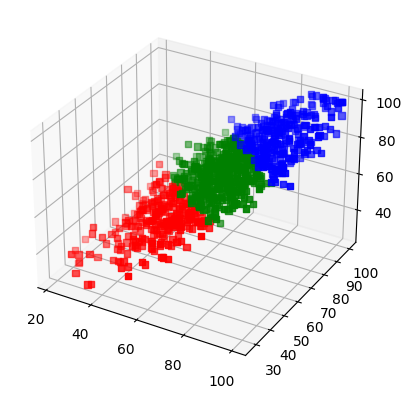

In [257]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(kmeans_df['math'])
y = np.array(kmeans_df['reading'])
z = np.array(kmeans_df['writing'])

ax.scatter(x,y,z, marker="s", c=kmeans_df["cluster name"])

plt.show()

Try another clustering algorithm, Fuzzy C-means

In [258]:
#Define parameters and funtions

#number of clusters
k = 3
#maximum number of iterations
MAX_ITER = 100
#number of data points
n = len(fcm_df)
#Fuzzy parameter
m = 1.7

def initializeMembershipMatrix():
  membership_mat = []
  for i in range(n):
    random_num_list = [random.random() for i in range(k)]
    summation = sum(random_num_list)
    temp_list = [x/summation for x in random_num_list]
    flag = temp_list.index(max(temp_list))
    for j in range(0, len(temp_list)):
      if (j == flag):
        temp_list[j] = 1
      else:
        temp_list[j] = 0

    membership_mat.append(temp_list)
  return membership_mat

def calculateClusterCenter(membership_mat):
  cluster_mem_val = list(zip(*membership_mat))
  cluster_centers = []
  for j in range(k):
    x = list(cluster_mem_val[j])
    xraised = [p ** m for p in x]
    denominator = sum(xraised)
    temp_num = []
    for i in range(n):
      data_point = list(fcm_df.iloc[i, 2:])
      prod = [xraised[i] * val for val in data_point]
      temp_num.append(prod)
    numerator = map(sum, list(zip(*temp_num)))
    center = [z/denominator for z in numerator]
    cluster_centers.append(center)
  return cluster_centers

def updateMembershipValue(membership_mat, cluster_centers):
  p = float(2/(m-1))
  for i in range(n):
    x = list(fcm_df.iloc[i, 2:])
    distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
    for j in range(k):
      den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
      membership_mat[i][j] = float(1/den)
  return membership_mat

def getClusters(membership_mat):
  cluster_labels = list()
  for i in range(n):
    max_val, idx = max((val,idx) for (idx, val) in enumerate(membership_mat[i]))
    cluster_labels.append(idx)
  return cluster_labels

def fuzzyCMeansClustering(): 
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers, membership_mat

In [259]:
#Implement FCM
labels, centers, membership_mat = fuzzyCMeansClustering()

In [260]:
#Membership matrix 
# membership_mat

In [261]:
#Get labels to fcm_df
fcm_df['cluster'] = labels
fcm_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,cluster
0,0,1,1,1,1,72,72,74,2
1,0,2,4,1,0,69,90,88,0
2,0,1,3,1,1,90,95,93,0
3,1,0,0,0,1,47,57,44,1
4,1,2,4,1,1,76,78,75,2
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,0
996,1,2,2,0,1,62,55,55,1
997,0,2,2,0,0,59,71,65,2
998,0,3,4,1,0,68,78,77,2


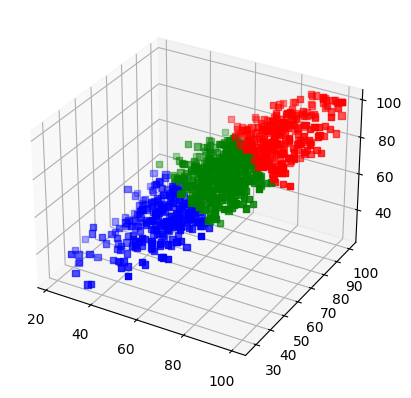

In [265]:
#Visualize clusters
#Naming clusters equal to color name
cluster_name = ({0 : 'Red', 
                        1 : 'Blue',
                        2 : 'Green'})
fcm_df['cluster name'] = fcm_df['cluster'].map(cluster_name)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(fcm_df['math'])
y = np.array(fcm_df['reading'])
z = np.array(fcm_df['writing'])

ax.scatter(x,y,z, marker="s", c=fcm_df["cluster name"])

plt.show()

We are done! Now let's move on to evaluating these 2 alogorithms' performance using Dunn Index.

In [277]:
#Define functions
def getInnerDistance(cluslabels,centre,data):
    innerDis = np.full(len(centre),0.0)
    for i in range(len(data)):
        cen = cluslabels[i]
        innerDis[cen] += np.linalg.norm(data[i]-centre[cen])

    for i in range(len(centre)):
        innerDis[i] = innerDis[i]/(cluslabels.count(i))
    return innerDis

def getDunnIndex(cluslabels,centre,data):
    inter = np.inf
    for i in range(len(centre)):
        for j in range(i+1,len(centre)):
            temp = np.linalg.norm(centre[i]-centre[j])
            if inter > temp:
                inter = temp

    intra = 0
    for i in range(len(data)):
        for j in range(i+1,len(data)):
            if cluslabels[i] == cluslabels[j]:
                temp = np.linalg.norm(data[i]-data[j])
                if intra < temp:
                    intra = temp
    dunnIdx = inter/intra
    return dunnIdx

Check the Dunn index of the result dataframe clustered by 2 algorithms

In [278]:
#Check Kmeans
print("Dunn index =", getDunnIndex(list(kmeans_df['cluster']), list(centroids), list(kmeans_df.iloc[:,2:-2].values)))

Dunn index = 0.48722454182805747


In [279]:
#Check FCM
print("Dunn index =", getDunnIndex(list(fcm_df['cluster']), np.array(centers), list(fcm_df.iloc[:,2:-2].values)))

Dunn index = 0.5099183939593874


FCM is a little bit better than k-means

Now is the last part but the most important: data mining

We are gonna be using k-means result

In [292]:
#Calculate average scores in each clusters
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([1, 2, 0], dtype='int64', name='cluster')

In [294]:
rank

cluster
1    84.408983
2    68.334096
0    50.912409
Name: total_ave_score, dtype: float64

In [284]:
#Concat data
research_df['cluster'] = kmeans_df['cluster']
research_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,final score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,2
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,2
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,0
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,2
998,female,group D,some college,standard,completed,68,78,77,74.333333,2


Let's define a function to represent the data in each cluster by pie chart

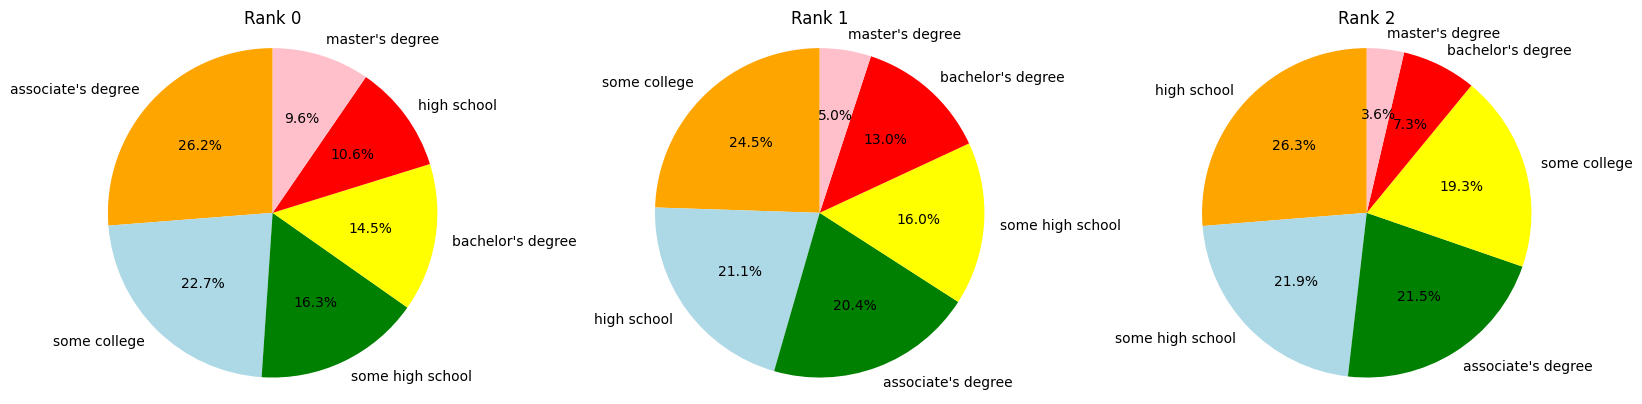

In [287]:
def plot_pie_chart(column):
    figfig = plt.figure(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","grey"]
    for idx in range(3):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = research_df[research_df["cluster"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")

Define a function to visualize the dataframe by bar

In [288]:
def plot_bar(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(3)
    for idx in range(3):
        num = "class"+ str(idx)
        num = research_df[research_df["cluster"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) 
            else:
                index_dict[key].append(percentage_of_column[key]) 
   
    percentage_of_column = research_df[research_df["cluster"]==rank.index[2]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('num of students')
    ax.set_title(column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()

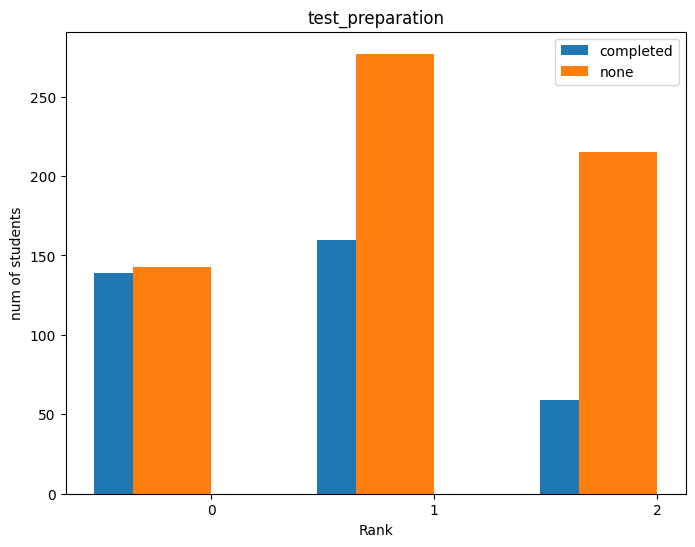

In [289]:
plot_bar("test_preparation")

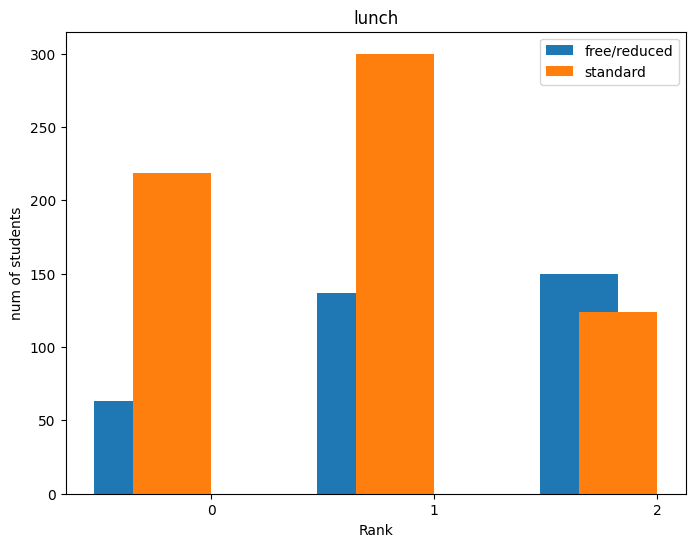

In [291]:
plot_bar("lunch")

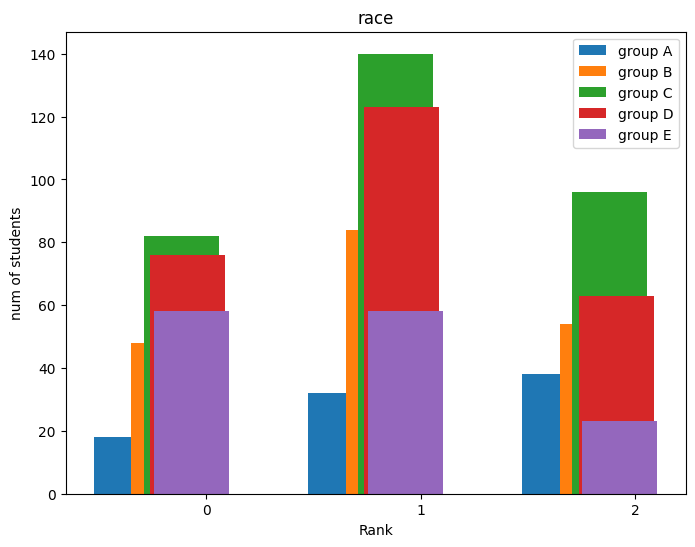

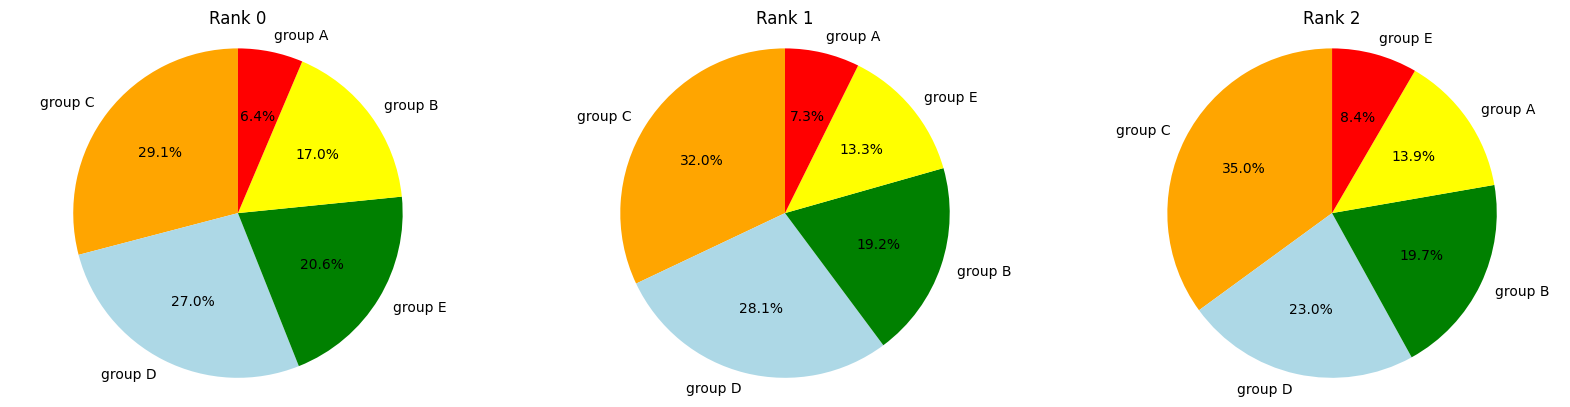

In [295]:
plot_bar("race")
plot_pie_chart("race")

#We are all done! 